In [3]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [11]:
df=pd.read_csv('Classified Data.csv',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


KNN main scale ki bht importance hoti like bhie wo values pe predict krta tou youve to scale it properly isiliye we use scaling method

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
# humein is scaler ko target class k ilawa jo predict krwani hai iske ilawa sb pe fit krna hai

In [18]:
scaler=StandardScaler()

In [20]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [22]:
# ab isko tranform krwado ye tranform kia kta basicallu centring and scaling krdeta

In [24]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [26]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

ye scaled version hai of the actual values - notice kro ye values apas m close hain eik dusre ke becuz theyre scaled

In [29]:
# ab in feature ko use krkr dataframe create krlo

In [35]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns)

ValueError: Shape of passed values is (1000, 10), indices imply (1000, 11)

In [40]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [44]:
# everything but the last one
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [46]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [48]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


# ab hamare paas eik standardize version hai data ka 
ab data ready hai for KNN

KYU K BHIE distance bw each feature bht depend krta 

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
X=df_feat
y=df['TARGET CLASS']


In [56]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

use KNN hum preidct krwa
na chharae ke model tarfet class haui ya nhi

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier(n_neighbors=1)

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
pred=knn.predict(X_test)

In [67]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

# how to chose best K/N NIGHBOUR
we use elbow method o choose the optimal K

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



kiakrenge ke 1 se 40,50 k darmiyan hum diff k values uthalenge 
unme dekhnege jisme sbse kam error rate hoga wo hi best k value hogi ao dekhte hain kese

In [79]:
error_rat=[]
for i in range(1,40):
    # 1 se 40 k darmiyan dekh
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rat.append(np.mean(pred_i!=y_test))
    # ye avg error rate hai where predictions not equal to actual test values
    

In [81]:
error_rat

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

In [83]:
# quite unreadble so we'll just plot graph to see

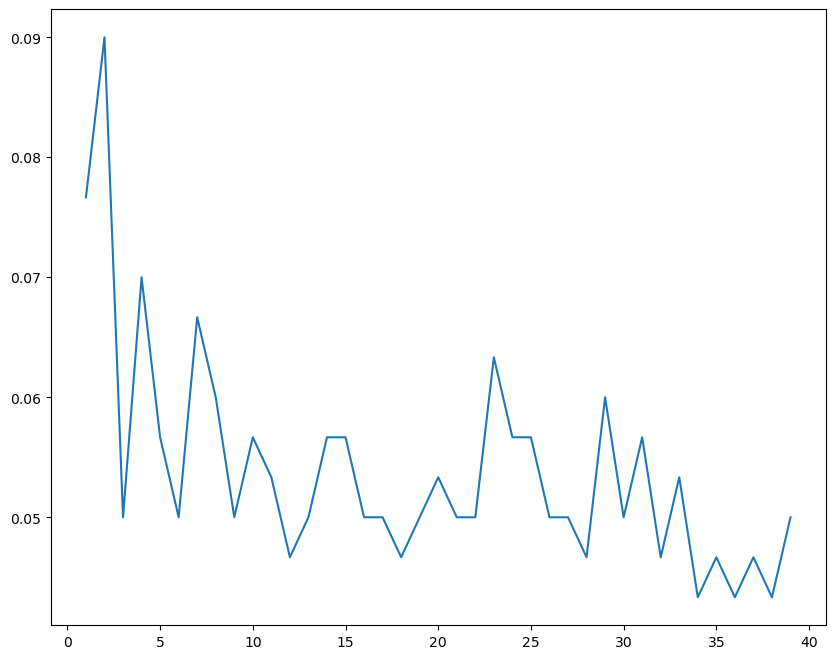

In [87]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rat)

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

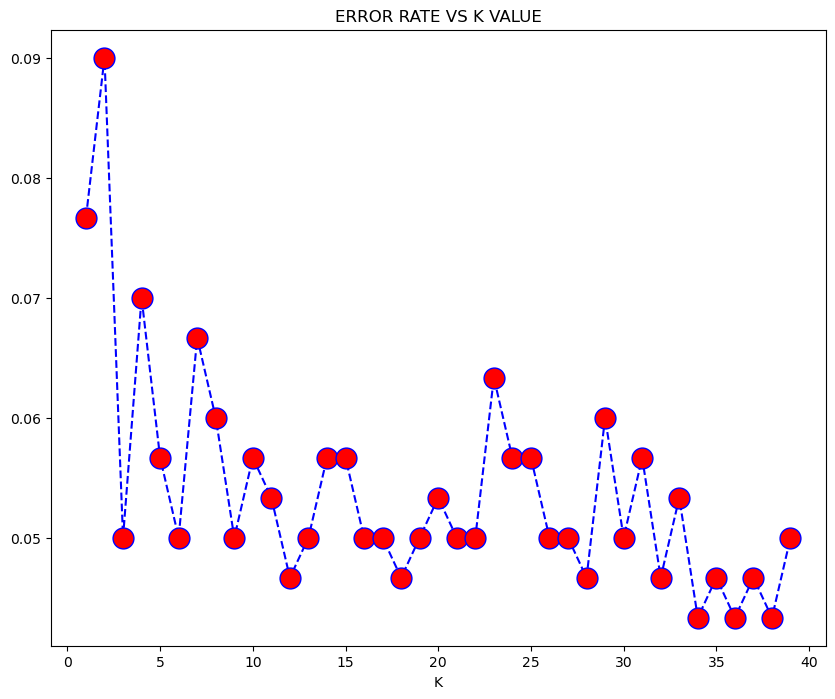

In [89]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rat,color='blue',linestyle='--',marker='o',
        markerfacecolor='red',markersize=15)
plt.title("ERROR RATE VS K VALUE")
plt.xlabel('K')
plt.label('error rate')


dekho jahan value k ki 30 hai whn kam hai error rate
aur see 20s m decrese hona shuru hua tou hum isi typeki value lenge
in our case k=17

 # with k=17
upar dekho classification report m avg jo tha wo 92 tha 
with k=17 95 tk ayega

In [93]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [95]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[152   7]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.95      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

